<center>
    <h2>Final Project : Student ID: 21200138</h3></center>

### Decemeber 20, 2021
## STAT40800 Data Programming with Python





## Introduction

Census data is the survey of people living in particular country with age, marital status, sex, place of birth, occupation and religion, number of family members, condition of living, education and if they are physically abled, language they speak ,etc.
Once all survey is collected, the data is accumulated and overall data can be presumed for each county, city or particular region.

As per census, one person from each family or household needs to fill the form containing questions on behalf of everyone. All these information are kept confidential and not shared with anyone. This data is only used by CSO for statistical purpose.

Census data is used by variety of people for different purposes as this accumulated data is later shared in open source. Some of the important use of census population data is to predict trends, help local authorities and local services for planning policy, for government to help share funding, businesses for store locations. This census data is collected every 5 years by Central Statistics Office. The data is collected so that the government or the governing body could provide proper service to the people of that country and what is utmost required in a particular county or region. It takes nearly a year to collect this data and another year to produce the data with proper documentation. 

For example, if an area has majority people are physically disabled then the governing body can provide more support towards them by improving mode of transport or roads or public schemes taking them into consideration.
In this particular project I am going to check if the physically challenged population for Males and predict the population of physically challenged population for Males for next year which will be my target variable and is dependent of migrated people as well as current people living in Ireland weather they are Irish or not.

In this project we are going to do analysis on age groups, Irish speaking population, marital status of them. The main focus would be on the Male disabled population and we will fit a regression model for it, based on the given parameters and their age group.

Our dataset here contains data of people county wise in Ireland. All 31 counties with their respective population and personal information are present, there are 802 columns in total. This amount of data is accumulated with the response of people by filling the forms. The total population of Ireland is 4761865 as per 2016 census data.

In this report, we will analyse three different themes. 
The first will be Population aged 0 - 19 by sex and year of age, persons aged 20 years and over by sex and age group along with Population by sex and marital status. Here, we have different columns of age wise split in population based on Male & Female. We will further club some columns to make it easier to understand as there are 15 columns given for age based on each sex, which is difficult to understand.

The second is Population aged 3 years and over by ability to speak Irish. We have been given Irish speaking count for each county.And last the third theme is Persons with disability by sex. Wherein we are given population of Male and Female who are disabled and a total of it.

We will check that if there is any linear relation between these parameters and if we can use this relation to find the significant variables to calculate the Male disabled population for next census data.


##### -> Importing all required packages below

We have used below basic packages from python library to analyse our data. Numpy and pandas are used to read data. Matplotlib and seaborn are used for creating plots and graphical interpretation which are required.
Statsmodels api is used regression model testing.
The warning api is imported to ignore the red warnings which are printed, which we don't require.

In [427]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import statsmodels.api as sm
from scipy import stats

In [428]:
import warnings
warnings.filterwarnings('ignore')

## Loading Data set

We are using data set based on county, we will use the name of the county as the index. There are 31 row data and 802 columns in total including the county names.

In [429]:
C_county = pd.read_csv('Census_by_county.csv', index_col='GEOGDESC')
C_county.shape

(31, 801)

## Data cleaning/pre-processing:

Below we are storing columns only for the three themes we mentioned: Theme 1(Age) ,2(Irish speaking) and 12(disability).
We have renamed all the columns for better understanding of the data.

In [430]:

data_county = C_county[["T1_1AGETM", "T1_1AGETF","T1_1AGETT","T3_1NO","T3_1NS","T3_1YES","T1_2MART","T1_2SEPT","T1_2DIVT","T1_2WIDT","T1_2T","T3_2ALLF","T3_2ALLM","T3_2ALLT","T12_1_M","T12_1_F","T12_1_T","T1_1AGE0M","T1_1AGE1M","T1_1AGE2M","T1_1AGE3M","T1_1AGE4M","T1_1AGE5M","T1_1AGE6M","T1_1AGE7M","T1_1AGE8M","T1_1AGE9M","T1_1AGE10M","T1_1AGE11M","T1_1AGE12M","T1_1AGE13M","T1_1AGE14M","T1_1AGE15M","T1_1AGE16M","T1_1AGE17M","T1_1AGE18M","T1_1AGE19M","T1_1AGE20_24M","T1_1AGE25_29M","T1_1AGE30_34M","T1_1AGE35_39M","T1_1AGE40_44M","T1_1AGE45_49M","T1_1AGE50_54M","T1_1AGE55_59M","T1_1AGE60_64M","T1_1AGE65_69M","T1_1AGE70_74M","T1_1AGE75_79M","T1_1AGE80_84M","T1_1AGEGE_85M"]]
data_county = data_county.rename(columns = {"T1_1AGETM":"MaleTotal","T1_1AGETF":"FemaleTotal","T1_1AGETT":"Total","T3_1NO":"IrishNo","T3_1NS":"IrishNotStated","T3_1YES":"IrishYes","T1_2MART":"Total_Married","T1_2SEPT":"Total_Separated","T1_2DIVT":"Total_Divorced","T1_2WIDT":"Total_Widow","T1_2T":"Total_Status","T3_2ALLF":"Irish_Females","T3_2ALLM":"Irish_Males","T3_2ALLT":"Irish_Total","T12_1_M":"Male_Disabled","T12_1_F":"Female_Disabled","T12_1_T":"Total_Disabled","T1_1AGE0M":"Male_Age_0","T1_1AGE1M":"Male_Age_1","T1_1AGE2M":"Male_Age_2","T1_1AGE3M":"Male_Age_3","T1_1AGE4M":"Male_Age_4","T1_1AGE5M":"Male_Age_5","T1_1AGE6M":"Male_Age_6","T1_1AGE7M":"Male_Age_7","T1_1AGE8M":"Male_Age_8","T1_1AGE9M":"Male_Age_9","T1_1AGE10M":"Male_Age_10","T1_1AGE11M":"Male_Age_11","T1_1AGE12M":"Male_Age_12","T1_1AGE13M":"Male_Age_13","T1_1AGE14M":"Male_Age_14","T1_1AGE15M":"Male_Age_15","T1_1AGE16M":"Male_Age_16","T1_1AGE17M":"Male_Age_17","T1_1AGE18M":"Male_Age_18","T1_1AGE19M":"Male_Age_19","T1_1AGE20_24M":"Male_Age_20_24","T1_1AGE25_29M":"Male_Age_25_29","T1_1AGE30_34M":"Male_Age_30_34","T1_1AGE35_39M":"Male_Age_35_39","T1_1AGE40_44M":"Male_Age_40_44","T1_1AGE45_49M":"Male_Age_45_49","T1_1AGE50_54M":"Male_Age_50_54","T1_1AGE55_59M":"Male_Age_55_59","T1_1AGE60_64M":"Male_Age_60_64","T1_1AGE65_69M":"Male_Age_65_69","T1_1AGE70_74M":"Male_Age_70_74","T1_1AGE75_79M":"Male_Age_75_79","T1_1AGE80_84M":"Male_Age_80_84","T1_1AGEGE_85M":"Male_Age_85"})
data_county.dtypes.head()

MaleTotal         object
FemaleTotal       object
Total             object
IrishNo           object
IrishNotStated    object
dtype: object

As we can notice most the data is in object datatype, which cannot be used since they should be numeric. Hence we will replace the string "," and convert it to numeric format for our use.

In [431]:
data_county.replace(',','', regex=True, inplace=True)
X = data_county.select_dtypes(object).columns
data_county[X] = data_county[X].apply(pd.to_numeric,errors = 'coerce')
data_county.dtypes.head()

MaleTotal         int64
FemaleTotal       int64
Total             int64
IrishNo           int64
IrishNotStated    int64
dtype: object

We need some additional columns for our explonatory data analysis, they are mentioned below:
Since we have 15 columns for Male age category we have divided it into 5 simple age groups Children_0_19, Millennials(20 to 34), Gen_X(35 to 49), Baby_Boomers(50 to 69) and Silent_generation(70 above). This 

In [432]:
data_county["Children_0_19"] = data_county["Male_Age_0"] + data_county["Male_Age_1"] + data_county["Male_Age_2"] + data_county["Male_Age_3"] + data_county["Male_Age_4"] + data_county["Male_Age_5"] + data_county["Male_Age_6"] + data_county["Male_Age_7"] + data_county["Male_Age_8"] + data_county["Male_Age_9"] + data_county["Male_Age_10"] + data_county["Male_Age_11"] + data_county["Male_Age_12"] + data_county["Male_Age_13"] + data_county["Male_Age_14"] + data_county["Male_Age_15"] + data_county["Male_Age_16"] + data_county["Male_Age_17"] + data_county["Male_Age_18"] + data_county["Male_Age_19"]
data_county['Millennials'] = data_county["Male_Age_20_24"]+data_county["Male_Age_25_29"]+data_county["Male_Age_30_34"]
data_county['Gen_X'] = data_county["Male_Age_35_39"]+data_county["Male_Age_40_44"]+data_county["Male_Age_45_49"]
data_county['Baby_Boomers'] = data_county["Male_Age_50_54"]+data_county["Male_Age_55_59"]+data_county["Male_Age_60_64"]+data_county["Male_Age_65_69"]
data_county['Silent_generation'] = data_county["Male_Age_70_74"]+data_county["Male_Age_75_79"]+data_county["Male_Age_80_84"]+data_county["Male_Age_85"]
data_county['NonIrish'] = data_county["Total"] - data_county["Irish_Total"]

data_county.head()

,MaleTotal,FemaleTotal,Total,IrishNo,IrishNotStated,IrishYes,Total_Married,Total_Separated,Total_Divorced,Total_Widow,...,Male_Age_70_74,Male_Age_75_79,Male_Age_80_84,Male_Age_85,Children_0_19,Millennials,Gen_X,Baby_Boomers,Silent_generation,NonIrish
GEOGDESC,,,,,,,,,,,,,,,,,,,,,
Cork City,61722,63935,125657,72457,4555,44822,39222,3110,3035,6451,...,2280,1720,1176,722,13007,17597,12218,13002,5898,80835
Clare,58785,60032,118817,58889,3001,52482,47160,3151,2674,5358,...,2290,1464,954,614,16907,9356,13070,14130,5322,66335
Cork County,206953,210258,417211,211657,8128,179317,167195,8933,9006,16264,...,6807,4545,2999,1874,62705,33875,48541,45607,16225,237894
Cavan,38330,37846,76176,46003,1657,25210,30010,1758,1652,3291,...,1345,923,644,449,11636,6392,8287,8654,3361,50966
Carlow,28465,28467,56932,32896,1458,20243,21235,1585,1360,2376,...,906,649,399,284,8349,5437,6322,6119,2238,36689


Below are some of the tables which we would require for analysis purpose:

In [433]:
#data_county.dtypes
data_Age = data_county[["MaleTotal", "FemaleTotal","Total","IrishNo","IrishYes"]]
data_Marriage = data_county[["Total_Married","Total_Separated","Total_Divorced","Total_Widow","Total_Status"]]
data_IrishSpeaker = data_county[["Irish_Females","Irish_Males","Irish_Total","Total","NonIrish"]]


## Exploratory data analysis

From below barplot we can clearly notice that Dublin City has the highest population, second is Cork followed by Fingal and South Dublin. 

<AxesSubplot:xlabel='GEOGDESC', ylabel='Total'>

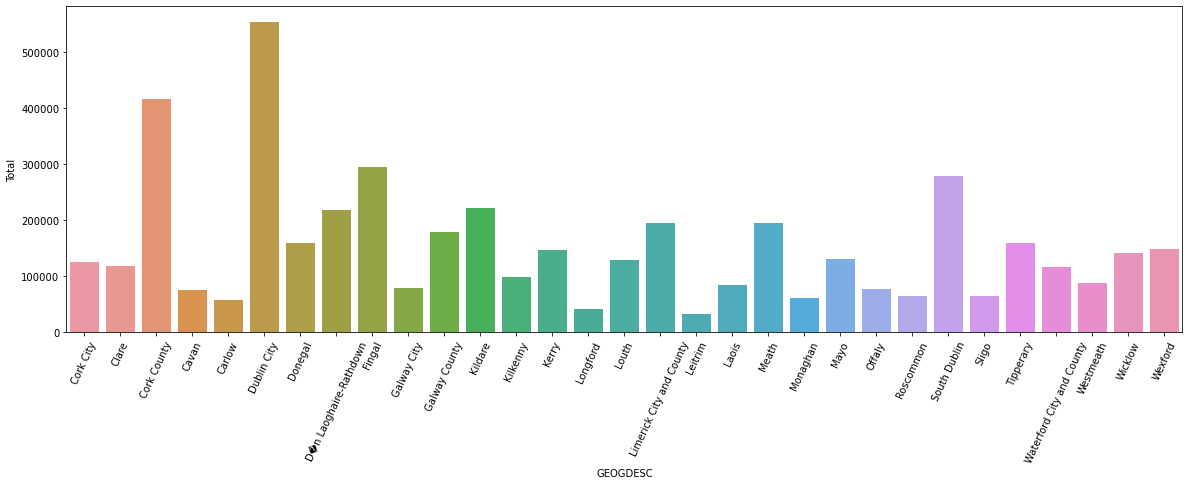

In [434]:
fig_dims = (20,6)
fig, ax = plt.subplots(figsize=fig_dims)
locs, labels = plt.xticks()
plt.setp(labels, rotation=65)
sns.barplot(x=data_Age.index, y="Total", data=data_Age,ax=ax)

In the below graph we can notice almost all counties have equal ratio of male and females. Also in the described table below we can notice we have almost the same ration of males and females.
Altough in the dataset we can notice in Ireland non Irish speakers are more the mean of non Irish speaking native is 86062.74 and Irish speaker is 56820.


In [435]:
data_Age.describe()

,MaleTotal,FemaleTotal,Total,IrishNo,IrishYes
count,31.000000,31.000000,31.000000,31.000000,31.000000
mean,75949.290323,77659.258065,153608.548387,86062.741935,56820.000000
std,54837.558564,56862.541966,111687.416866,65723.586516,38287.421603
min,16064.000000,15980.000000,32044.000000,17676.000000,12300.000000
25%,38584.000000,39995.500000,78314.500000,45443.500000,29473.500000
50%,63633.000000,65251.000000,128884.000000,72457.000000,49955.000000
75%,93319.500000,93543.000000,187144.500000,98281.500000,74538.000000
max,272270.000000,282284.000000,554554.000000,344099.000000,179317.000000


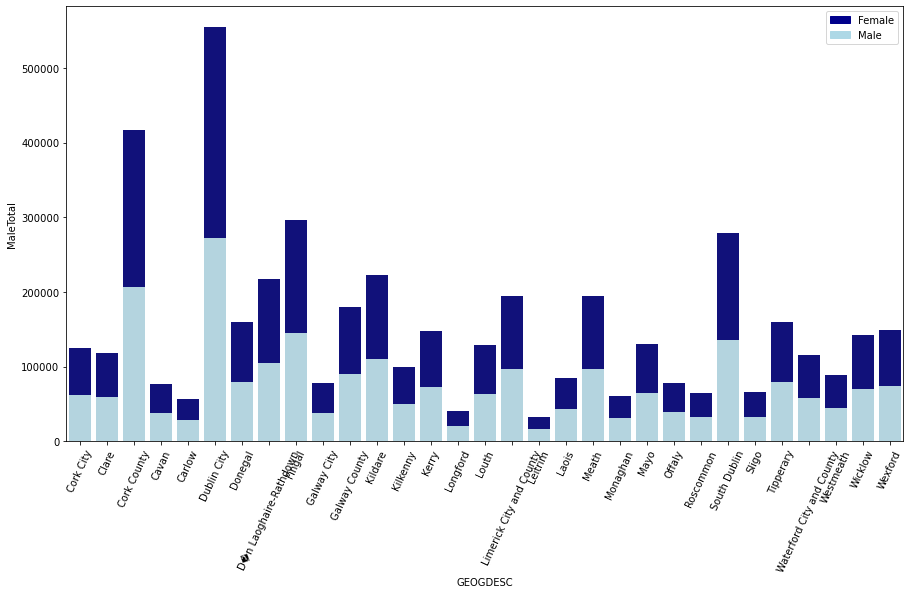

In [436]:
# set the figure size
plt.figure(figsize=(15, 8))
bar1 = sns.barplot(x=data_Age.index,  y="Total", data=data_Age, color='darkblue')

bar2 = sns.barplot(x=data_Age.index, y="MaleTotal", data=data_Age, color='lightblue')
locs, labels = plt.xticks()
plt.setp(labels, rotation=65)
top_bar = mpatches.Patch(color='darkblue', label='Female')
bottom_bar = mpatches.Patch(color='lightblue', label='Male')
plt.legend(handles=[top_bar, bottom_bar])
plt.show()

Since our aim is to analyse disabled citizens of Ireland, we would like to just check if there is any relationship between Disability of a person and his relationship status.
And as we can notice there is positive relation between all the charts.
Which indicates that there is a positive correlation here between columns Total_Disabled and Relationship status.

Text(0.5, 1.0, 'Widowed count')

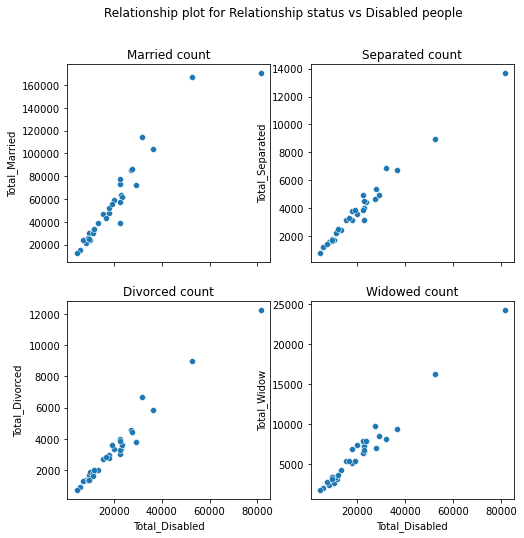

In [437]:

fig, axes = plt.subplots(2, 2, sharex=True, figsize=(8,8))
fig.suptitle('Relationship plot for Relationship status vs Disabled people')

sns.scatterplot(ax=axes[0,0], x="Total_Disabled", y="Total_Married", data=data_county)
axes[0,0].set_title("Married count")
sns.scatterplot(ax=axes[0,1], x="Total_Disabled", y="Total_Separated", data=data_county)
axes[0,1].set_title("Separated count")
sns.scatterplot(ax=axes[1,0], x="Total_Disabled", y="Total_Divorced", data=data_county)
axes[1,0].set_title("Divorced count")
sns.scatterplot(ax=axes[1,1], x="Total_Disabled", y="Total_Widow", data=data_county)
axes[1,1].set_title("Widowed count")

For Male and Female theme in Irish speakers, we can notice that all the counties have more females who speak Irish language.
Even in smallest counties the majority of Irish speakers are females.

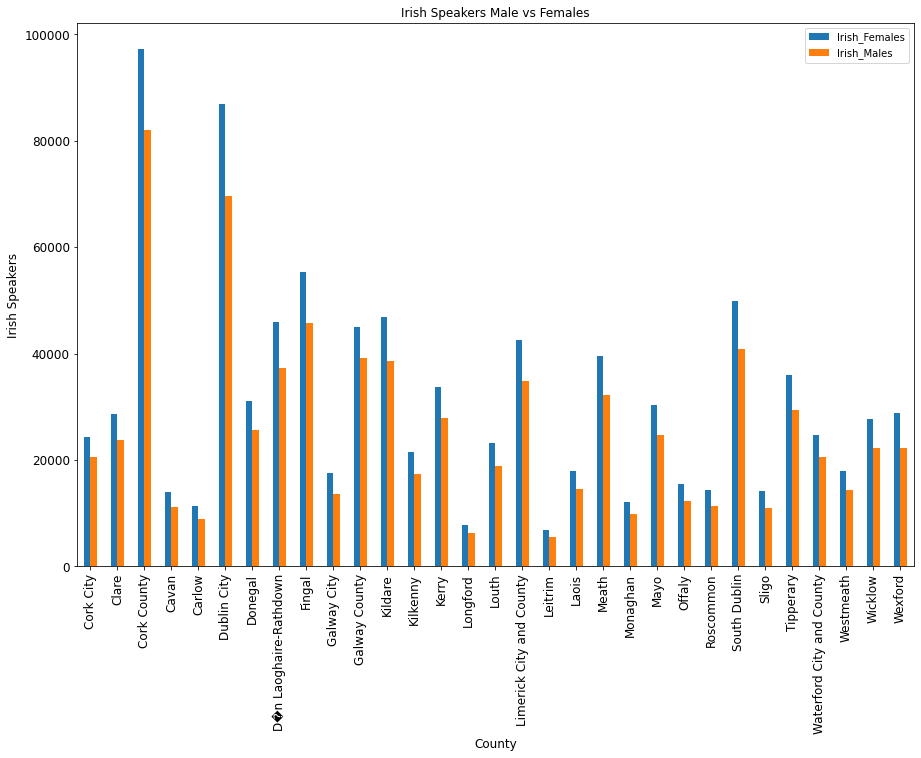

In [438]:

ax = data_IrishSpeaker[['Irish_Females','Irish_Males']].plot(kind='bar', title ="Irish Speakers Male vs Females", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("County", fontsize=12)
ax.set_ylabel("Irish Speakers", fontsize=12)
plt.show()


We can clearly notice this with the below grid as the mean of Irish_Females is greater than Irish_Males.

In [439]:
data_IrishSpeaker.describe()

,Irish_Females,Irish_Males,Irish_Total,Total,NonIrish
count,31.000000,31.000000,31.000000,31.000000,31.000000
mean,31250.870968,25569.129032,56820.000000,153608.548387,96788.548387
std,20888.828242,17407.014716,38287.421603,111687.416866,75585.243163
min,6858.000000,5442.000000,12300.000000,32044.000000,19744.000000
25%,16536.500000,12937.000000,29473.500000,78314.500000,50560.000000
50%,27671.000000,22284.000000,49955.000000,128884.000000,80835.000000
75%,41011.500000,33526.500000,74538.000000,187144.500000,110020.000000
max,97269.000000,82048.000000,179317.000000,554554.000000,398118.000000


Text(0.5, 1.0, 'Irish Speaking Total')

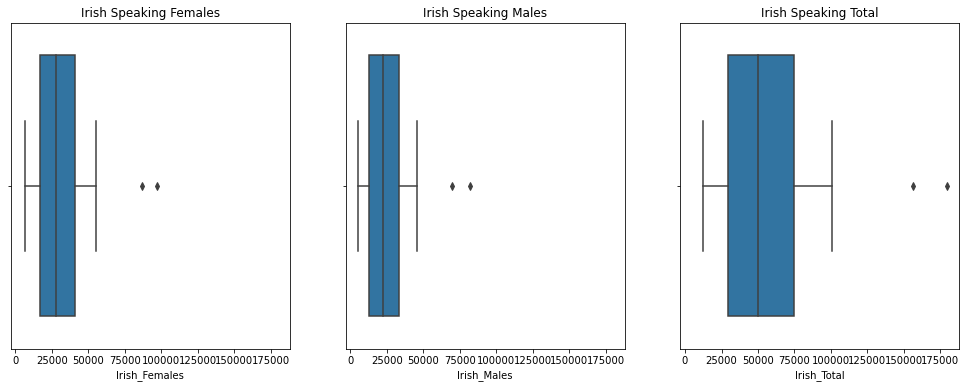

In [440]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(17,6))
sns.boxplot(ax = axes[0], x=data_IrishSpeaker["Irish_Females"])
axes[0].set_title("Irish Speaking Females")
sns.boxplot(ax = axes[1], x=data_IrishSpeaker["Irish_Males"])
axes[1].set_title("Irish Speaking Males")
sns.boxplot(ax = axes[2], x=data_IrishSpeaker["Irish_Total"])
axes[2].set_title("Irish Speaking Total")

As we can notice that there are two outliers in plot for Irish speaking males and females, where there are more than 150000 Irish speakers, we can get these counties as shown in below code. Dublin and Cork have highest Irish speakers due to it majority.  

In [441]:
data_IrishSpeaker[data_IrishSpeaker["Irish_Total"] > 150000]

,Irish_Females,Irish_Males,Irish_Total,Total,NonIrish
GEOGDESC,,,,,
Cork County,97269,82048,179317,417211,237894
Dublin City,86863,69573,156436,554554,398118


As we can notice below the each county has more other language people and Irish population is minority in Ireland.
Dublin has less than half of Irish speaking population.

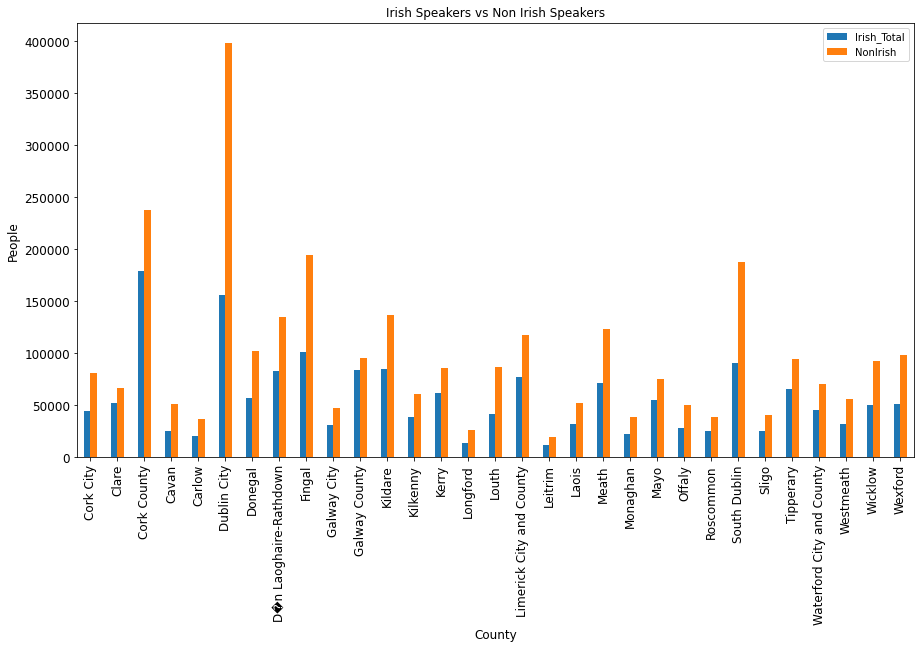

In [442]:

ax = data_IrishSpeaker[['Irish_Total','NonIrish']].plot(kind='bar', title ="Irish Speakers vs Non Irish Speakers", figsize=(15, 8), legend=True, fontsize=12)
ax.set_xlabel("County", fontsize=12)
ax.set_ylabel("People", fontsize=12)
plt.show()


In the below scatterplot we see positive correlation for all the charts for Male, female and total based on Irish and Non Irish population.

Text(0.5, 1.0, 'Non - Irish Total disabled')

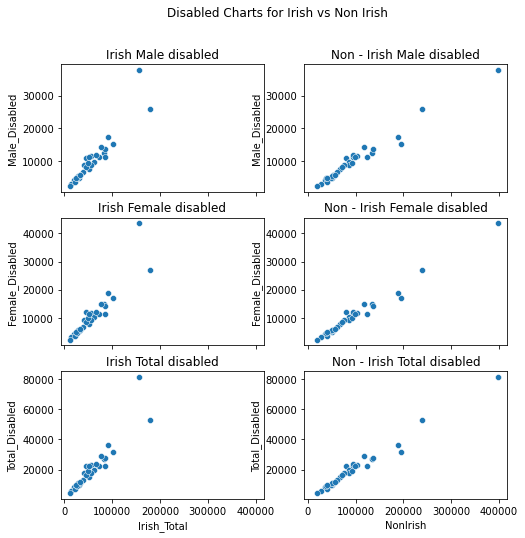

In [443]:
data_Disabled = data_county[["Male_Disabled","Female_Disabled","Total_Disabled","Irish_Total","NonIrish"]]

fig, axes = plt.subplots(3, 2, sharex=True, figsize=(8,8))
fig.suptitle('Disabled Charts for Irish vs Non Irish')

sns.scatterplot(ax=axes[0,0], x="Irish_Total", y="Male_Disabled", data=data_Disabled)
axes[0,0].set_title("Irish Male disabled")
sns.scatterplot(ax=axes[0,1], x="NonIrish", y="Male_Disabled", data=data_Disabled)
axes[0,1].set_title("Non - Irish Male disabled")


sns.scatterplot(ax=axes[1,0], x="Irish_Total", y="Female_Disabled", data=data_Disabled)
axes[1,0].set_title("Irish Female disabled")
sns.scatterplot(ax=axes[1,1], x="NonIrish", y="Female_Disabled", data=data_Disabled)
axes[1,1].set_title("Non - Irish Female disabled")


sns.scatterplot(ax=axes[2,0], x="Irish_Total", y="Total_Disabled", data=data_Disabled)
axes[2,0].set_title("Irish Total disabled")
sns.scatterplot(ax=axes[2,1], x="NonIrish", y="Total_Disabled", data=data_Disabled)
axes[2,1].set_title("Non - Irish Total disabled")

In the below plot we can observe the intercept of Silent generation is higher than others and Children_0_19 has the smallest intercept. This is because the population of Silent generation is lowest and hence higher positive correlation.

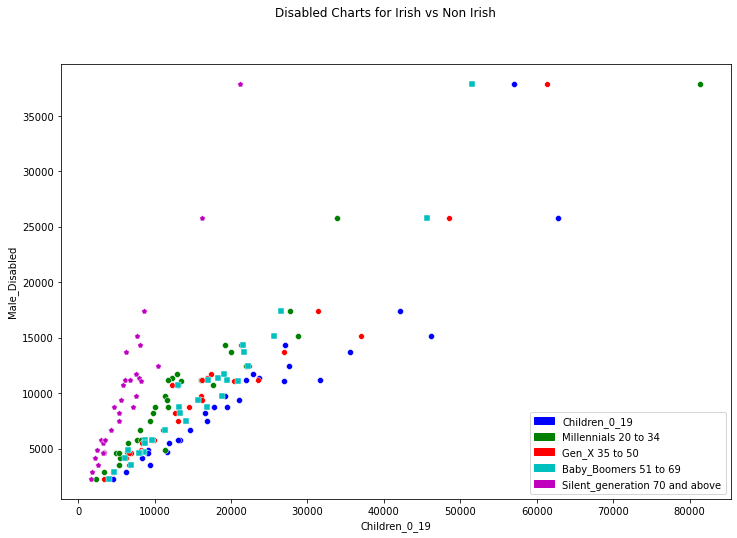

In [444]:

fig, axes = plt.subplots(1, 1, sharex=True, figsize=(12,8))
fig.suptitle('Disabled Charts for Irish vs Non Irish')

sns.scatterplot(x="Children_0_19", y="Male_Disabled", data=data_county,color='b')
sns.scatterplot(x="Millennials", y="Male_Disabled", data=data_county,color='g',marker = 'o')
sns.scatterplot(x="Gen_X", y="Male_Disabled", data=data_county,color='r',marker = '8')
sns.scatterplot(x="Baby_Boomers", y="Male_Disabled", data=data_county,color='c',marker = 's')
sns.scatterplot(x="Silent_generation", y="Male_Disabled", data=data_county,color='m',marker = 'p')

first = mpatches.Patch(color='b', label='Children_0_19')
second= mpatches.Patch(color='g', label='Millennials 20 to 34')
third = mpatches.Patch(color='r', label='Gen_X 35 to 50')
fourth= mpatches.Patch(color='c', label='Baby_Boomers 51 to 69')
fifth = mpatches.Patch(color='m', label='Silent_generation 70 and above')
plt.legend(handles=[first, second,third,fourth,fifth])

In [445]:
data_county = data_county.drop(['Total','IrishNo','Total_Status','Irish_Total','Total_Disabled','Irish_Females','Irish_Males',"Male_Age_0","Male_Age_1","Male_Age_2","Male_Age_3","Male_Age_4","Male_Age_5","Male_Age_6","Male_Age_7","Male_Age_8","Male_Age_9","Male_Age_10","Male_Age_11","Male_Age_12","Male_Age_13","Male_Age_14","Male_Age_15","Male_Age_16","Male_Age_17","Male_Age_18","Male_Age_19","Male_Age_20_24","Male_Age_25_29","Male_Age_30_34","Male_Age_35_39","Male_Age_40_44","Male_Age_45_49","Male_Age_50_54","Male_Age_55_59","Male_Age_60_64","Male_Age_65_69","Male_Age_70_74","Male_Age_75_79","Male_Age_80_84","Male_Age_85"],axis=1)

## Statistical analysis:

We are keeping the target variable as "Male_Disabled" for us to calculate.
We firstly will standardize the data to fit a linear model.
In the above cell, we removed unwanted variables which are directly or indirectly already mentioned in below table.

In [446]:
data_county_std = (data_county-data_county.mean())/data_county.std()
data_county_std.insert(0,'intercept',1)
mod = sm.OLS(data_county_std.Male_Disabled,data_county_std.drop('Male_Disabled',axis=1))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          Male_Disabled   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     6485.
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           9.83e-29
Time:                        14:54:03   Log-Likelihood:                 88.412
No. Observations:                  31   AIC:                            -148.8
Df Residuals:                      17   BIC:                            -128.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept          9.714e-17      0.00

Here we fitted a linear model, with Male_Disabled as traget variable and  the all the other required parameter and here our beta1 value i.e intercept value is 9.714e-17.
If we compare the probability of t-test, with 95% confidence interval then Gen_X, Children_0_19 & Silent_generation are the significant variables for our target variable "Male_Disabled"

Our model should be:
<br/> <center>Y=  beta0 + X1*beta1 + X2*beta2 +.....+Xn*betan + ε </center>


Examining the values of the model  parameters, the model can therefore be fully described as:

<br/> <center>Male_Disabled= 9.714e-17 + 0.2910 * MaleTotal -0.5061 * FemaleTotal -0.0807 * IrishNotStated -0.0593 * IrishYes -0.7024 * Total_Married + 0.0233 * Total_Separated -0.0403 * Total_Divorced -0.2614 * Total_Widow + 1.0744 * Female_Disabled + 0.3333 * Children_0_19 + 0.0613 * Millennials + 0.3754 * Gen_X + 0.4312 * Baby_Boomers + 0.2025 * Silent_generation - 0.1396 * NonIrish  + ε
   <br/><br/> 
    
We will now test the residuals to check our assumptions of linear model:<br/>
-> Residuals should have zero conditional mean.<br/> 
-> Residuals should have constant variation.<br/>
-> Residuals should be normally distributed.<br/>



First we will calculate 'residuals' mean:

In [447]:
print("The mean of the residuals of the model is: ", res.mse_resid)

The mean of the residuals of the model is:  0.0003558042174532481


The residuals were then plotted against their index to assess the nature of their variation:

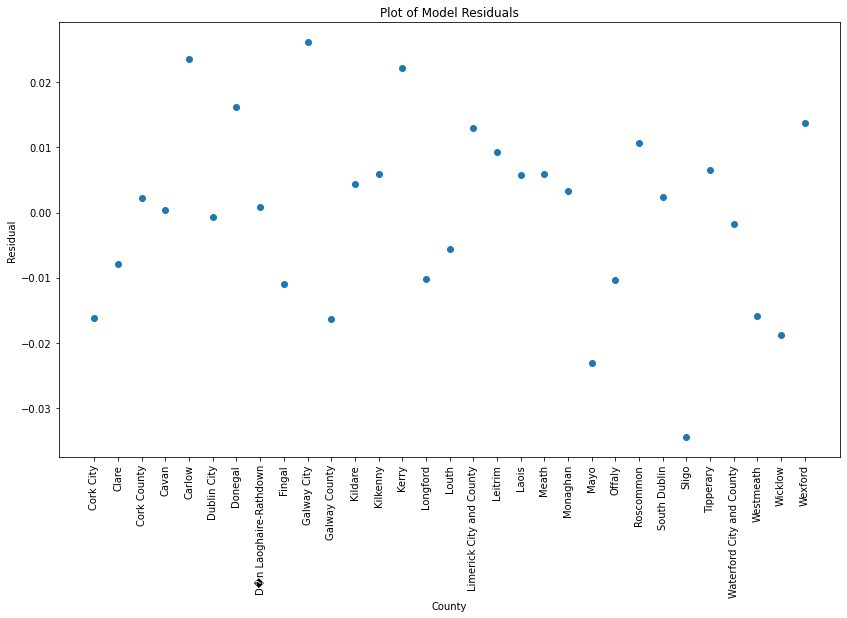

In [448]:
plt.figure(figsize=(14,8))
plt.plot(res.resid, 'o')
plt.title("Plot of Model Residuals")
plt.ylabel("Residual")
plt.xlabel("County")
plt.xticks(rotation=90)
plt.show()



Finally, a histogram of the residuals, and a QQ-plot were constructed to check their normality:

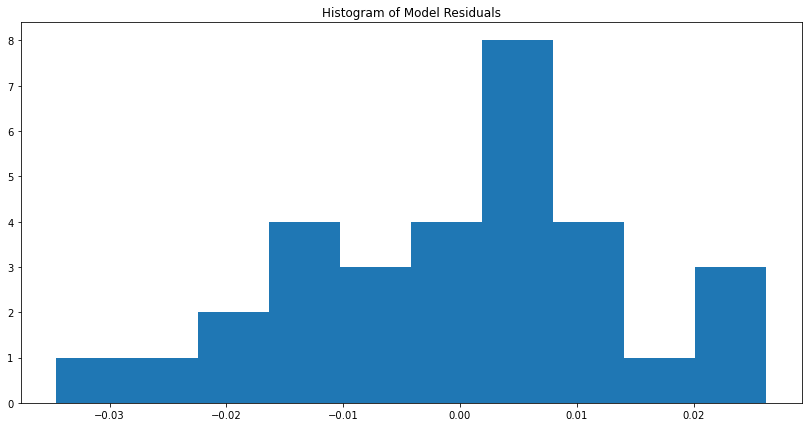

In [449]:
plt.figure(figsize=(14,7))
plt.hist(res.resid)
plt.title("Histogram of Model Residuals")
plt.show()

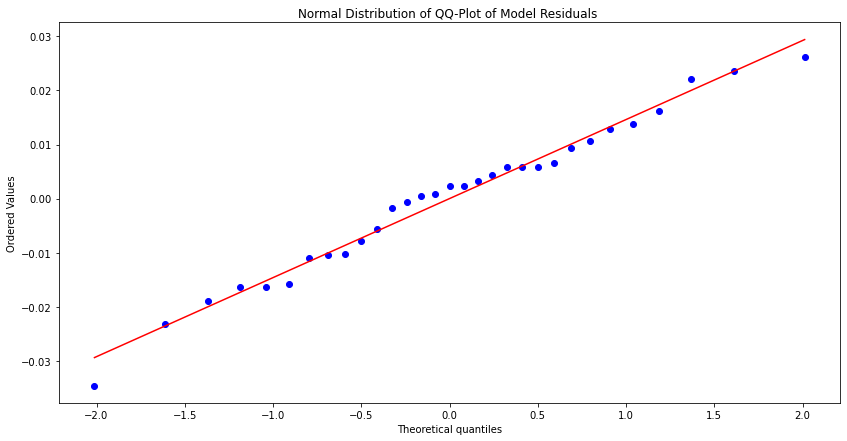

In [450]:
plt.figure(figsize=(14,7))
stats.probplot(res.resid, dist='norm',plot=plt)
plt.title("Normal Distribution of QQ-Plot of Model Residuals ")
plt.show()


## Conclusion:

Investigation between the relationship of male disabled and all the other parameters Age, marital status and native language have some relationship. However, on further research we found that there exist a linear relationship between these parameters.

Our aim was to create model to calculate male disabled population based on the other parameters and we found an equation to do so:

<center>Y= 9.714e-17 + 0.2910 * MaleTotal -0.5061 * FemaleTotal -0.0807 * IrishNotStated -0.0593 * IrishYes -0.7024 * Total_Married + 0.0233 * Total_Separated -0.0403 * Total_Divorced -0.2614 * Total_Widow + 1.0744 * Female_Disabled + 0.3333 * Children_0_19 + 0.0613 * Millennials + 0.3754 * Gen_X + 0.4312 * Baby_Boomers + 0.2025 * Silent_generation - 0.1396 * NonIrish + ε</center>


We can do further research to remove some variables and add some significant variables based on some other theme parameters.

In conclusion, the objective of the expirement was met; investigation into a linear relationship
between the the relationship of male disabled and all the other parameters Age, marital status and native language determined that this form of relationship is appropriate. The stage is set for further research into more complex models,
aided by the release of more complete data on the subject.
